In [258]:
from sklearn import datasets
import numpy.linalg as lin
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
import cv2
from sklearn.model_selection import train_test_split
import keras.utils as utils

In [3]:
class MyLayer :
    def __init__(self, unit ) :
        self.unit = unit
        print('unit ', unit)
        print("hello")
        
    def test(self, v) :
        print(v)                   
        
    def __call__(self, v) :
        print(self.unit, v)        
        return self
        
        
#A = MyLayer()
#A.test(10)
#A(20)

#A = MyLayer()(20)
# A = MyLayer()
# A(20)

#A = MyLayer(20)([1,2,3,4,5])
A = MyLayer(20)
A([1,2,3,4,5])

A([3,3,4])
A.test([3,3,4])

B = MyLayer(50)
C = MyLayer(50)   
# callable :  이미 생성된 객체에 대해서 함수처럼 호출할 수 있도록 함

unit  20
hello
20 [1, 2, 3, 4, 5]
20 [3, 3, 4]
[3, 3, 4]
unit  50
hello
unit  50
hello


In [196]:
orl = fetch_olivetti_faces()
data = orl.data   # 0~1로 정규화 되어 있음.
target = orl.target
print(data.shape)
print(target.shape)

(400, 4096)
(400,)


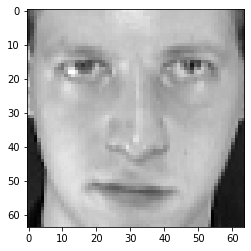

In [3]:
plt.imshow( data[2,:].reshape(64,64), cmap='gray'  )

In [197]:
data = np.zeros((400, 32*32), dtype='uint8')

for i, d in enumerate(orl.data) :      
    image = cv2.resize(d.reshape(64, 64), (32, 32))
    data[i, :] = image.flatten() * 255 
    
print(data.shape)

(400, 1024)


In [198]:
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size = 0.2)
print(X_train.shape)
print(X_val.shape)  

(320, 1024)
(80, 1024)


In [199]:
X_train = X_train.reshape(-1, 32, 32, 1) / 255
X_val = X_val.reshape(-1, 32, 32, 1)  / 255

y_train_e = utils.to_categorical(y_train, 40)
y_val_e = utils.to_categorical(y_val, 40)

In [200]:
print(X_train.shape)
print(y_train_e.shape)
print(X_val.shape)
print(y_val_e.shape)

(320, 32, 32, 1)
(320, 40)
(80, 32, 32, 1)
(80, 40)


In [210]:
input_shape = (32, 32, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',
                     activation='relu',input_shape=input_shape, name="conv1_1"))
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',
                     activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',
                     activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',
                     activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu')) 
model.add(Dense(512, activation='relu')) 
model.add(Dense(40, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 2048)            

In [211]:
history = model.fit(X_train, y_train_e ,
                        batch_size=20,
                        epochs=40,
                        verbose=2,
                        validation_data=(X_val, y_val_e ))

Train on 320 samples, validate on 80 samples
Epoch 1/40
 - 2s - loss: 3.6998 - accuracy: 0.0250 - val_loss: 3.6953 - val_accuracy: 0.0000e+00
Epoch 2/40
 - 1s - loss: 3.6862 - accuracy: 0.0469 - val_loss: 3.7131 - val_accuracy: 0.0000e+00
Epoch 3/40
 - 1s - loss: 3.6804 - accuracy: 0.0500 - val_loss: 3.7451 - val_accuracy: 0.0000e+00
Epoch 4/40
 - 1s - loss: 3.6233 - accuracy: 0.0531 - val_loss: 3.7312 - val_accuracy: 0.0375
Epoch 5/40
 - 1s - loss: 3.1533 - accuracy: 0.2375 - val_loss: 3.1843 - val_accuracy: 0.1750
Epoch 6/40
 - 1s - loss: 1.7751 - accuracy: 0.4969 - val_loss: 1.5306 - val_accuracy: 0.6250
Epoch 7/40
 - 1s - loss: 0.7513 - accuracy: 0.7688 - val_loss: 1.0439 - val_accuracy: 0.6375
Epoch 8/40
 - 1s - loss: 0.3582 - accuracy: 0.8656 - val_loss: 0.2972 - val_accuracy: 0.9375
Epoch 9/40
 - 1s - loss: 0.1152 - accuracy: 0.9875 - val_loss: 0.7442 - val_accuracy: 0.7875
Epoch 10/40
 - 1s - loss: 0.1024 - accuracy: 0.9750 - val_loss: 0.3691 - val_accuracy: 0.9125
Epoch 11/40


In [212]:
model.evaluate(X_val, y_val_e)

80/80 [==============================] - 0s 512us/step


[0.11312396824359894, 0.9750000238418579]

In [215]:
model.summary()
print(type(model.layers))

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 2048)            

In [70]:
for layer in model.layers:
    print(layer.name)

print(model.layers[0].name)

conv1_1
max_pooling2d_27
conv2d_25
max_pooling2d_28
flatten_14
dense_27
dense_28
conv1_1


In [99]:
W = model.layers[0].get_weights()
print(len(W))
print(W[0].shape)
print(W[1].shape)

2
(3, 3, 1, 16)
(16,)


In [83]:
filters = W[0]

In [161]:
f1= filters[:,:,0, 0]
print(f1)
f2= filters[:,:,0, 1]
print(f2)

[[0.07678232 0.34190795 0.146504  ]
 [0.14134705 0.43327117 0.39510193]
 [0.4205303  0.18616171 0.49230945]]
[[-0.07157938  0.28079307  0.20438272]
 [ 0.28405577  0.13809189  0.35002577]
 [ 0.18982638  0.34501594  0.18919358]]


In [86]:
# max pooling
print( model.layers[1].get_weights())

[]


(3, 3, 16, 32)
[[-0.03682064 -0.00074931  0.05236206]
 [-0.06017359  0.00503225 -0.10840616]
 [ 0.01368103 -0.11158139  0.06894418]]


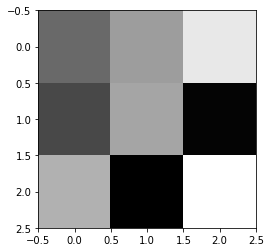

In [162]:
W2 = model.layers[2].get_weights()
filters = W2[0]
print(filters.shape)

f1= filters[:,:,0, 0]
print(f1)

plt.imshow(f1, cmap='gray')

In [173]:
from keras.models import Model

model2 = Model(inputs=model.inputs, outputs=model.layers[0].output)

In [178]:
l = X_train[0,:,:,:]
print(l.shape)

l = X_train[200:201,:,:,:]
print(l.shape)

(28, 28, 1)
(1, 28, 28, 1)


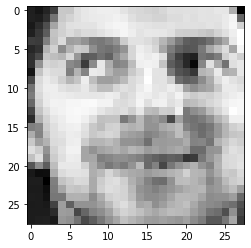

In [179]:
plt.imshow(l[0, :,:,0], cmap='gray')

In [110]:
A = np.array([[1,2,3], [4,5,6]])
print(A)
print( A[0, 0])
print( A[0:1, 0:1])

[[1 2 3]
 [4 5 6]]
1
[[1]]


(1, 28, 28, 16)


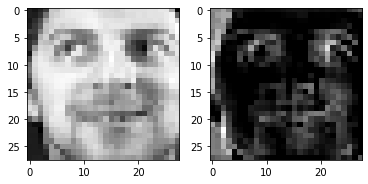

In [180]:
feature_maps = model2.predict(l)

print(feature_maps.shape)

img = feature_maps[0, :,:, 0]

plt.subplot(121)
plt.imshow(l[0, :,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(img, cmap='gray')

In [146]:
W2 = model.layers[0].get_weights()
filters = W2[0]
f1= filters[:,:,0, 2]
print(f1)

img = feature_maps[0, :,:, 2]
print(img)

[[ 0.05764334  0.0188739   0.15785088]
 [-0.15046956 -0.18231577 -0.18899447]
 [-0.05983679 -0.18051739 -0.15247342]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

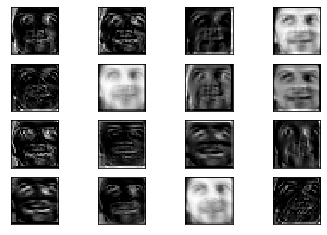

In [181]:
for ix in range(16) :
    ax = plt.subplot(4,4, ix+1)     
    fm = feature_maps[0,:,:,ix]
    plt.imshow(fm, cmap='gray')  
    ax.set_xticks([])
    ax.set_yticks([])

(1, 16, 16, 32)


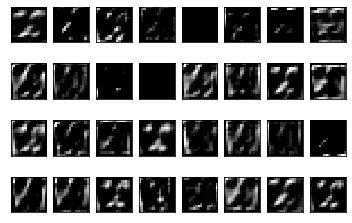

In [219]:
model3 = Model(inputs=model.inputs, outputs=model.layers[4].output)
l = X_train[187:188,:,:,:]
feature_maps = model3.predict(l)
print(feature_maps.shape)

for ix in range(32) :
    ax = plt.subplot(4, 8, ix+1)     
    fm = feature_maps[0,:,:,ix]
    plt.imshow(fm, cmap='gray')  
    ax.set_xticks([])
    ax.set_yticks([])

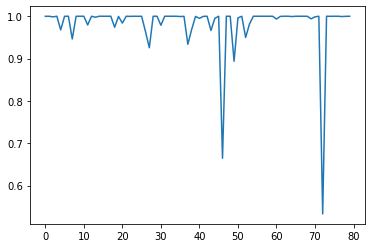

In [225]:
p = model.predict(X_val)

p = np.max(p, axis=1)

plt.plot(p)

In [231]:
p = [0.01, 0.01, 0.01, 0.01, 0.02]
p =p / np.sum(p)
print(p)

p = [0.7, 0.01, 0.01, 0.01, 0.02]
p =p / np.sum(p)
print(p)



[0.16666667 0.16666667 0.16666667 0.16666667 0.33333333]
[0.93333333 0.01333333 0.01333333 0.01333333 0.02666667]


In [244]:
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size = 0.2)
X_train = X_train.reshape(-1, 32, 32, 1)
X_val = X_val.reshape(-1, 32, 32, 1)
y_train_e = utils.to_categorical(y_train, 40)
y_val_e = utils.to_categorical(y_val, 40)

input_shape = (32, 32, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',
                     activation='relu',input_shape=input_shape, name="conv1_1"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',
                     activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu')) 
model.add(Dense(40, activation='softmax'))
model.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train_e ,
                        batch_size=20,
                        epochs=50,
                        verbose=1,
                        validation_data=(X_val, y_val_e ))
model.evaluate(X_val, y_val_e)

Train on 320 samples, validate on 80 samples
Epoch 1/50
320/320 [==============================] - 1s 4ms/step - loss: 3.0411 - accuracy: 0.2969 - val_loss: 33.0497 - val_accuracy: 0.0500
Epoch 2/50
320/320 [==============================] - 1s 2ms/step - loss: 0.8232 - accuracy: 0.7844 - val_loss: 23.6028 - val_accuracy: 0.0625
Epoch 3/50
320/320 [==============================] - 1s 2ms/step - loss: 0.1832 - accuracy: 0.9625 - val_loss: 21.2789 - val_accuracy: 0.0625
Epoch 4/50
320/320 [==============================] - 1s 2ms/step - loss: 0.0448 - accuracy: 0.9906 - val_loss: 13.1868 - val_accuracy: 0.0625
Epoch 5/50
320/320 [==============================] - 1s 2ms/step - loss: 0.0474 - accuracy: 0.9875 - val_loss: 9.8875 - val_accuracy: 0.0875
Epoch 6/50
320/320 [==============================] - 1s 2ms/step - loss: 0.0403 - accuracy: 0.9906 - val_loss: 8.4116 - val_accuracy: 0.1250
Epoch 7/50
320/320 [==============================] - 1s 2ms/step - loss: 0.0165 - accuracy: 0.9969

[0.12327032312750816, 0.9624999761581421]

In [251]:
d = np.array([10,80,20,50,20,20,50])
n = d / np.max(d)
print(n)

n = d - np.mean(d)
print(n)

print(np.mean(n))
print(np.std(n))

d = np.array([10,80,20,50,1212, 212, 20,20,50])
n = ( d - np.mean(d) ) / np.std(d)
print(n)

print(np.mean(n))
print(np.std(n))


[0.125 1.    0.25  0.625 0.25  0.25  0.625]
[-25.71428571  44.28571429 -15.71428571  14.28571429 -15.71428571
 -15.71428571  14.28571429]
-1.0150610510858574e-15
23.211538298959887
[-0.47896718 -0.28846887 -0.45175313 -0.370111    2.79216093  0.07075651
 -0.45175313 -0.45175313 -0.370111  ]
-1.850371707708594e-17
1.0


In [254]:
X_train, X_val, y_train, y_val =     train_test_split(data, target, test_size = 0.2)
X_train = X_train.reshape(-1, 32, 32, 1)
X_val = X_val.reshape(-1, 32, 32, 1)
y_train_e = utils.to_categorical(y_train, 40)
y_val_e = utils.to_categorical(y_val, 40)

In [255]:
input_shape = (32, 32, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',
                     activation='relu',input_shape=input_shape, name="conv1_1"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',
                     activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(512, activation='relu')) 
model.add(BatchNormalization())

model.add(Dense(40, activation='softmax'))
model.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train_e ,
                        batch_size=20,
                        epochs=50,
                        verbose=1,
                        validation_data=(X_val, y_val_e ))
model.evaluate(X_val, y_val_e)

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 8, 8, 32)          128       
_________________________________________________________________
flatten_30 (Flatten)         (None, 2048)            

[0.10227670818567276, 0.949999988079071]